# Assignment 2 - Knapsack Problem using Genetic Algorithm 

## Nayan Arora - u3249907

#### 1.	Randomly initialise the list of items

In [527]:
#define all input libraries below
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

#we use np.arrange to initiaize a list 10 items
item_no = np.arange(1,11)

#now we randomly initialize the list of items with a random weight and corresponding price (value)
weight = np.random.randint(1, 15, size = 10)
price = np.random.randint(10, 750, size = 10)

#initializing the maximum weight of the knapsack (bag) as 35kg
knapsack_max_threshold = 35

#### 2. Output list as - Item No, Weight, Value.

In [528]:
print('The list output as Item No, Weight, Value is below:')
print('')
print('----------------')
print('')
print('Item Number   Weight   Value')
for index in range(item_no.shape[0]):
    print('   {0}          {1}         {2}'.format(item_no[index], weight[index], price[index]))


The list output as Item No, Weight, Value is below:

----------------

Item Number   Weight   Value
   1          7         80
   2          6         697
   3          6         387
   4          2         730
   5          3         682
   6          13         43
   7          14         579
   8          3         372
   9          12         544
   10          2         297


#### 3.	Declare the initial population

In [529]:
#below aer further initializations for the GA
solutions_per_population = 8
population_size = (solutions_per_population, item_no.shape[0])
print('The Population size = {}'.format(population_size))
number_of_generations = 50

#Now we define the Initial population with each gene value as (1,0)
#This helps determine if an item is present in the knapsack or not.
initial_pop = np.random.randint(2, size = population_size)
initial_pop = initial_pop.astype(int)

The Population size = (8, 10)


#### 4.	Print initial population

In [530]:
print('Initial population: \n{}'.format(initial_pop))

Initial population: 
[[1 0 1 1 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1 0 1]
 [1 0 1 1 0 0 0 0 1 1]
 [0 0 0 1 0 0 1 1 0 0]
 [1 1 1 0 0 0 1 1 0 0]
 [1 1 1 1 1 1 0 0 1 1]
 [1 0 0 0 1 0 0 0 0 1]
 [0 0 1 1 1 0 0 1 1 0]]


#### 5.	Definition of the fitness function

In [531]:
#Definition of the fitness function
def population_fitness(weight, price, population, max_threshold):
    fitness = np.empty(population.shape[0])
    for index in range(population.shape[0]):
        sum_1 = np.sum(population[index] * price) #sum of price to get total price
        sum_2 = np.sum(population[index] * weight) #sum of weight to get total weight
        if sum_2 <= max_threshold:
            fitness[index] = sum_1
        else :
            fitness[index] = 0 
    return fitness.astype(int)

#### 6. Selection function to select the fittest individuals

In [532]:
#definition of the selection function
def selection(population, fitness, number_of_parents):
    fitness = list(fitness)
    parents = np.empty((number_of_parents, population.shape[1]))
    for index in range(number_of_parents):
        max_fitness_index = np.where(fitness == np.max(fitness)) #select the index of the highest fitting value.
        parents[index,:] = population[max_fitness_index[0][0], :] #get solution using the index 
        fitness[max_fitness_index[0][0]] = -99999999
    return parents

#### 7. One-point cross over function

In [533]:
#now we define the one-point crossover function
def one_point_crossover(parents, size_of_children):
    offsprings = np.empty((size_of_children, parents.shape[1]))
    crossover_index = int(parents.shape[1]/2)
    #setting a high value for crossover rate ensures a higher number of fittest individuals will be crossovered.
    crossover_rate = 0.8  
    
    i=0
    while (parents.shape[0] < size_of_children):
        parent1_index = i % parents.shape[0]
        parent2_index = (i+1) % parents.shape[0]
        x = rd.random()

        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        
        offsprings[i, 0:crossover_index] = parents[parent1_index, 0:crossover_index]
        offsprings[i, crossover_index:] = parents[parent2_index, crossover_index:]
        i = i + 1
    return offsprings    

#### 8. Mutation Function 

In [534]:
#definition of the mutation function
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        random_value = rd.random() 
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        
        #we randomly choose the chromosome that will undergo mutation
        int_random_value = randint(0,offsprings.shape[1] - 1)    
        
        #here we use the bit-flip technique to change the gene value of 0 to 1 and 1 to 0.
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants  

#### 9. Function calls in order to maximize item value

In [535]:
#define function calls below for maximizing the knapsack
def maximize_knapsack(weight, price, population, population_size, number_of_generations, max_threshold):
    optimal_outputs, optimal_fitnesses = [], []
    number_of_parents = int(population_size[0]/2)
    total_children = population_size[0] - number_of_parents 
    
    for i in range(number_of_generations):
        fitness = population_fitness(weight, price, population, max_threshold)
        optimal_fitnesses.append(fitness)
        parents = selection(population, fitness, number_of_parents,)
        offsprings = one_point_crossover(parents, total_children)
        mutants = mutation(offsprings)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants

    print('Most recent generation: \n{}\n'.format(population)) 
    
    most_recent_fitness = population_fitness(weight, price, population, max_threshold)
    print('Fitness values for the most recent generation: \n{}'.format(most_recent_fitness))
    
    maximum_fitness = np.where(most_recent_fitness == np.max(most_recent_fitness))
    optimal_outputs.append(population[maximum_fitness[0][0],:])
    return optimal_outputs, optimal_fitnesses

#### 10. Resultant items that maximize the Knapsack

In [536]:
#now we call the maximize function with the earlier defined initialization with maximum weight 35kg
optimal_outputs, optimal_fitnesses = maximize_knapsack(weight, price, initial_pop, population_size, number_of_generations, knapsack_max_threshold)
print('\nThe optimized values for the randomly defined initializations are: \n{}'.format(optimal_outputs))

#get the item number of optimal values
maximizing_item_numbers = item_no * optimal_outputs

print('\n----------Result---------')
print('\nItem numbers that will maximize the knapsack without breaking it:')
for i in range(maximizing_item_numbers.shape[1]):
  if maximizing_item_numbers[0][i] != 0:
     print('{}'.format(maximizing_item_numbers[0][i]))

Most recent generation: 
[[0 1 1 1 1 0 0 1 1 1]
 [0 1 1 1 1 0 0 1 1 1]
 [0 1 1 1 1 0 0 1 1 1]
 [0 1 1 1 1 0 0 1 1 1]
 [0 1 1 1 1 1 0 1 1 1]
 [0 1 1 1 1 0 0 1 1 1]
 [0 1 1 1 1 0 0 1 1 1]
 [0 1 0 1 1 0 0 1 1 1]]

Fitness values for the most recent generation: 
[3709 3709 3709 3709    0 3709 3709 3322]

The optimized values for the randomly defined initializations are: 
[array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1])]

----------Result---------

Item numbers that will maximize the knapsack without breaking it:
2
3
4
5
8
9
10


#### 11. Changes in Fitness over generations

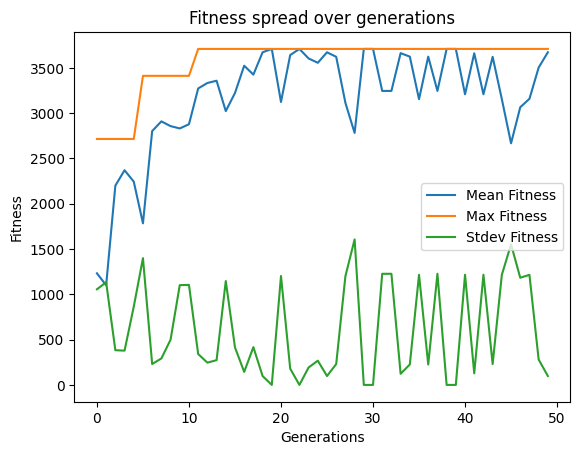

(50, 8)


In [537]:
mean_optimal_fitnesses = [np.mean(fitness) for fitness in optimal_fitnesses]
max_fitness = [np.max(fitness) for fitness in optimal_fitnesses]
std_fitness = [np.std(fitness) for fitness in optimal_fitnesses]

#plot the results to visualize the mean, max and min fitnesses over generations
plt.plot(list(range(number_of_generations)), mean_optimal_fitnesses, label = 'Mean Fitness')
plt.plot(list(range(number_of_generations)), max_fitness, label = 'Max Fitness')
plt.plot(list(range(number_of_generations)), std_fitness, label = 'Stdev Fitness')
plt.legend()
plt.title('Fitness spread over generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(optimal_fitnesses).shape)

#### References
[1] S. Tiwari, “Genetic Algorithm: Part 3 — Knapsack Problem,” Medium, Apr. 28, 2019. https://medium.com/koderunners/genetic-algorithm-part-3-knapsack-problem-b59035ddd1d6
‌